In [5]:
import os, sys
from tarfile import data_filter

import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ast

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)  # One level above dir1

plt.rcParams.update({
    'figure.dpi': 300,
    'axes.labelsize': 30.0,
    'axes.titlesize': 30.0,
    'axes.labelweight': 'normal',
    'axes.linewidth': 1.25,
    'legend.fontsize': 25,
    'legend.title_fontsize': 18.0,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'lines.linewidth': 2.0,
    'lines.markersize': 6.0,
    'grid.color': '.8',
    'grid.linestyle': '-',
    'grid.linewidth': 1.0,
})

if dir1 not in sys.path: sys.path.append(dir0)

from src.config import PPOConfig
from src.utils import ExperimentUtils

In [31]:
def plot_variance(path):
    df = pd.read_csv(path)
    df["rewards"] = df["rewards"].apply(ast.literal_eval)
    df["rewards"] = df["rewards"].apply(lambda outer: [np.mean(inner) for inner in outer])

    df_exploded = df.explode("rewards")

    df_exploded["rewards"] = df_exploded["rewards"].astype(float)

    # Initialize the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_exploded, x="agents", y="rewards", hue="strategy", dodge=True)

    # Final touches
    plt.ylabel("Mean Reward")
    plt.xlabel("Agents")
    ax.get_legend().remove()

    # Get positions and draw lines/text
    positions = ax.get_xticks()
    unique_agents = df_exploded["agents"].unique()
    for pos, agent_count in zip(positions, unique_agents):
        group_mean = df_exploded[df_exploded["agents"] == agent_count]["rewards"].mean()
        ax.hlines(group_mean, pos - 0.4, pos + 0.4, colors="black", linestyles="--", linewidth=1.5)

        # Text to the left of the line, centered vertically
        ax.text(pos - 0.4, group_mean, f"{group_mean:.1f}",
                ha="right", va="center", fontsize=18, color="black", rotation=90)

    plt.tight_layout()
    plt.show()
    return df_exploded


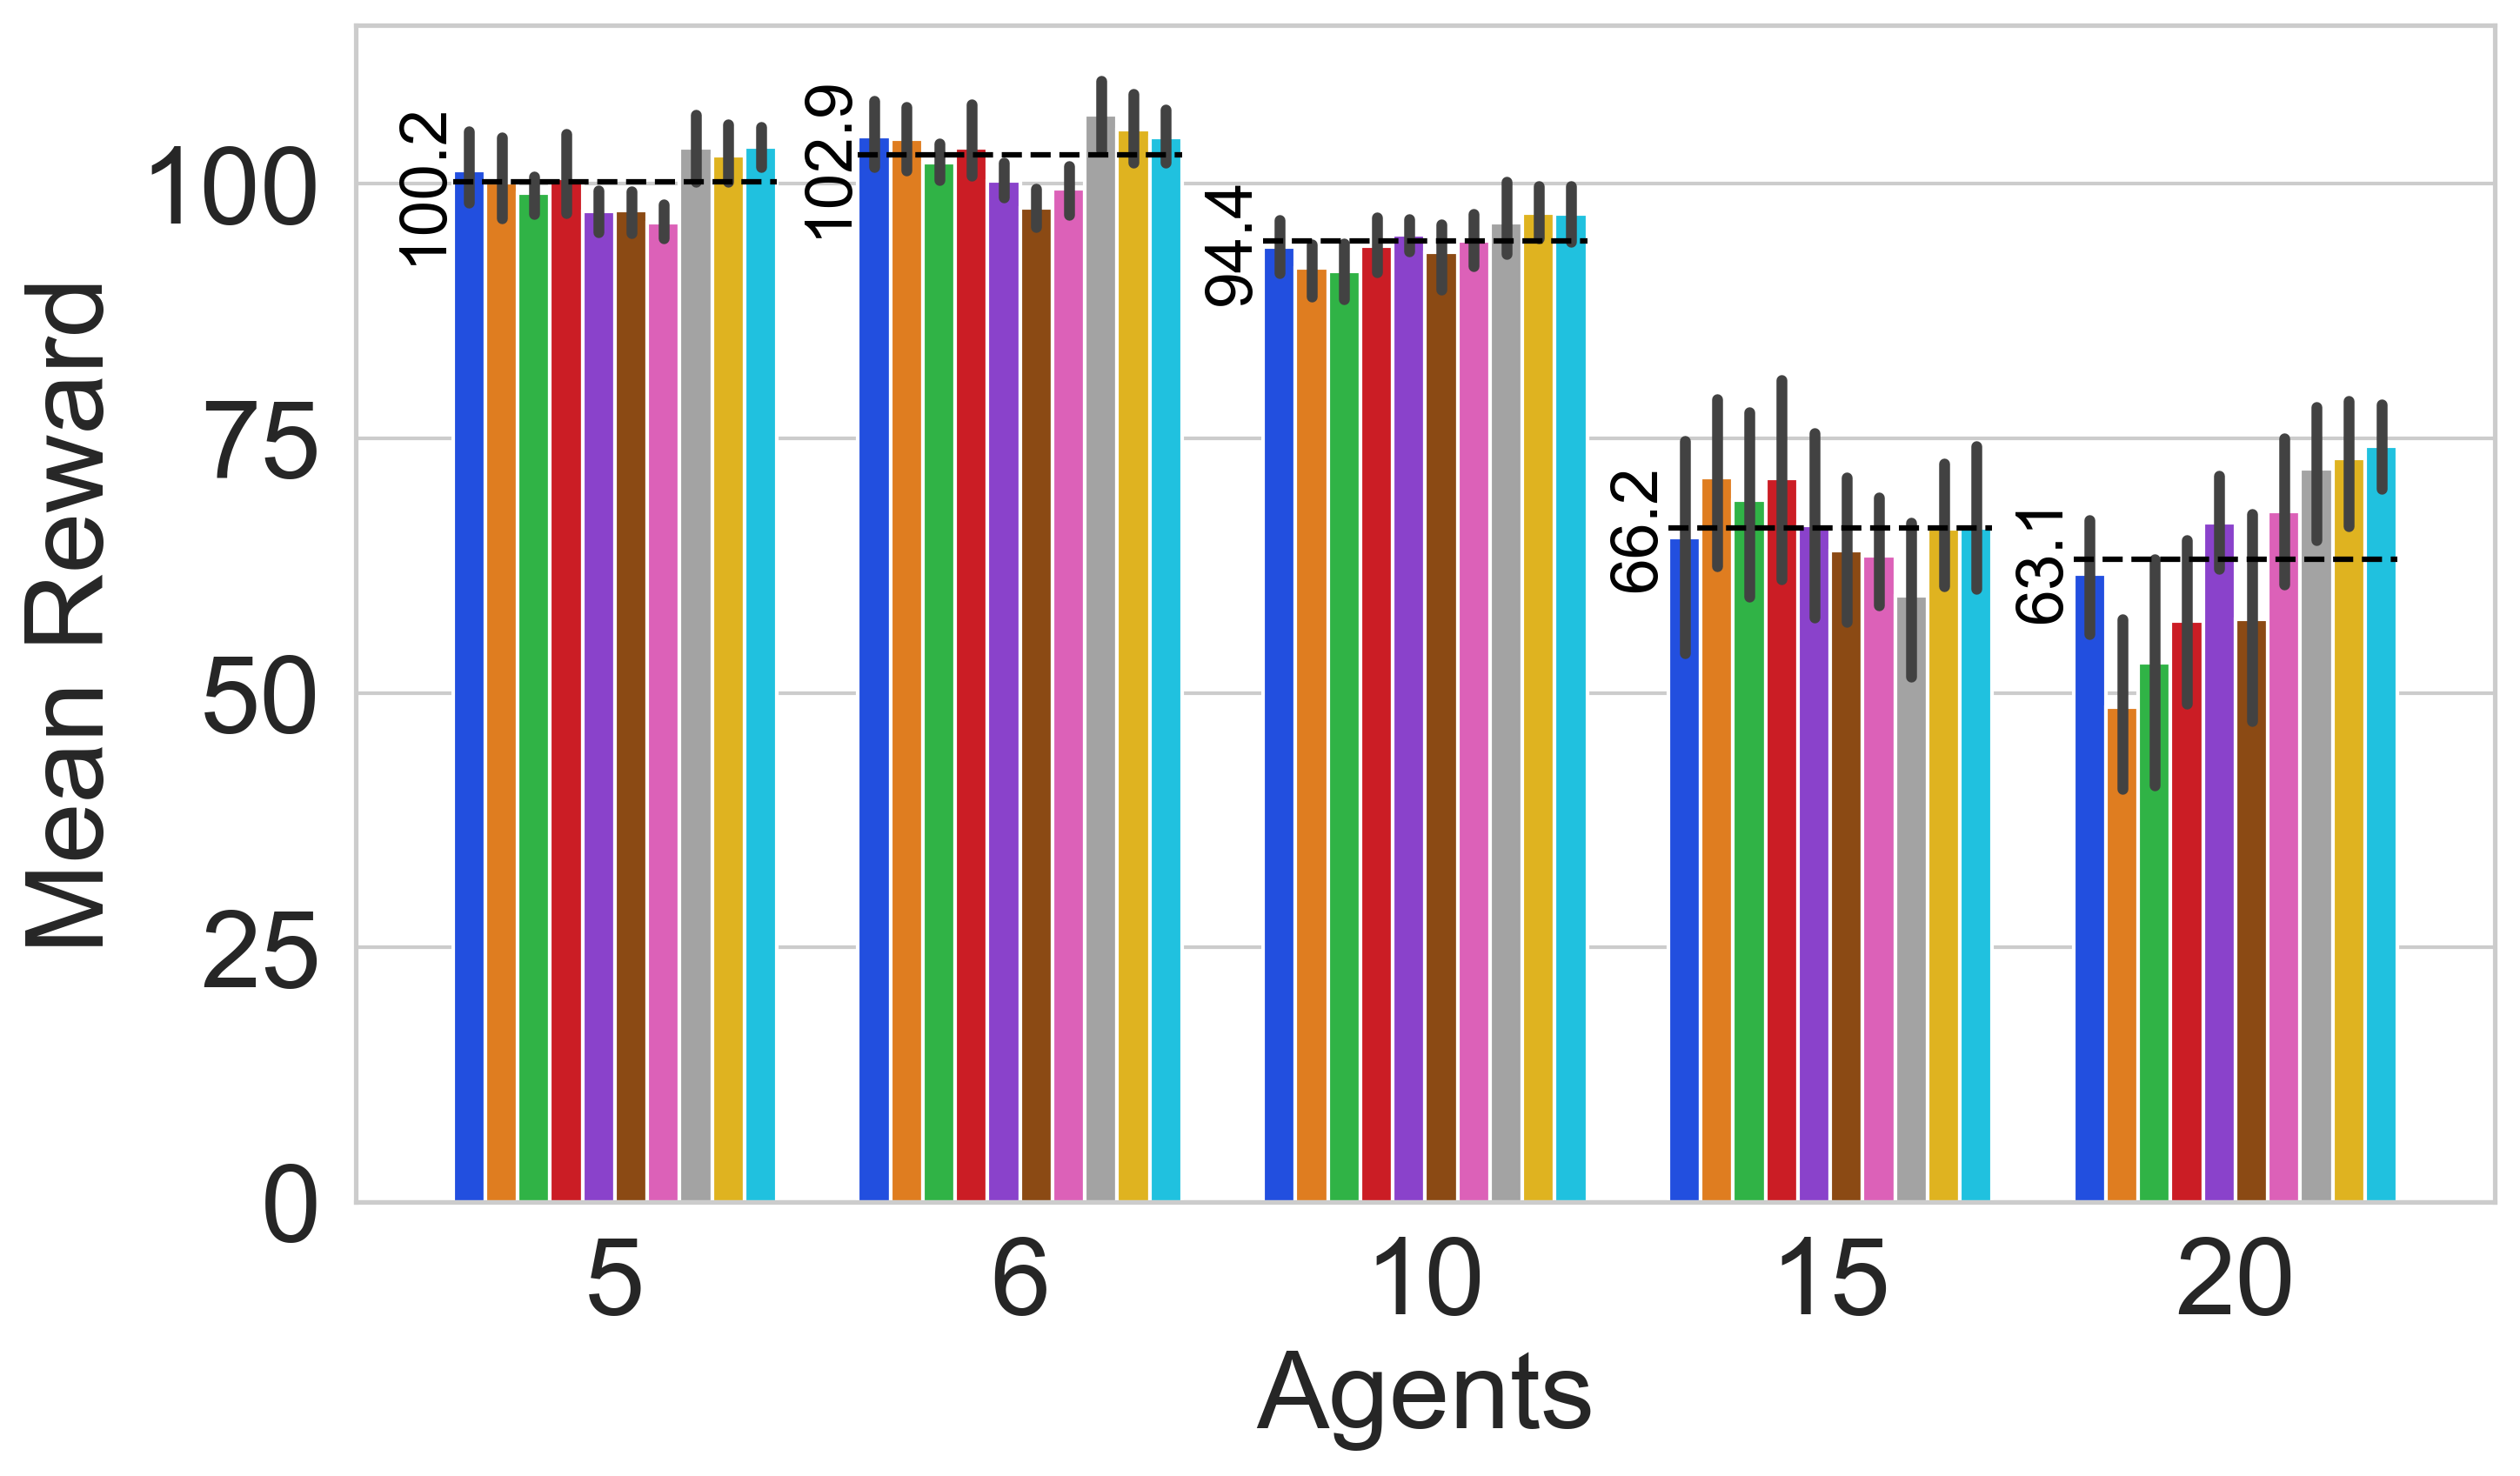

In [32]:
path = '/Users/simonhampp/Desktop/MA/swarm-rl/src/experiments_ma/7_generalizability/saved_experiments/2_balance_train_low_roll_high_rollout.csv'
df_eee=plot_variance(path)


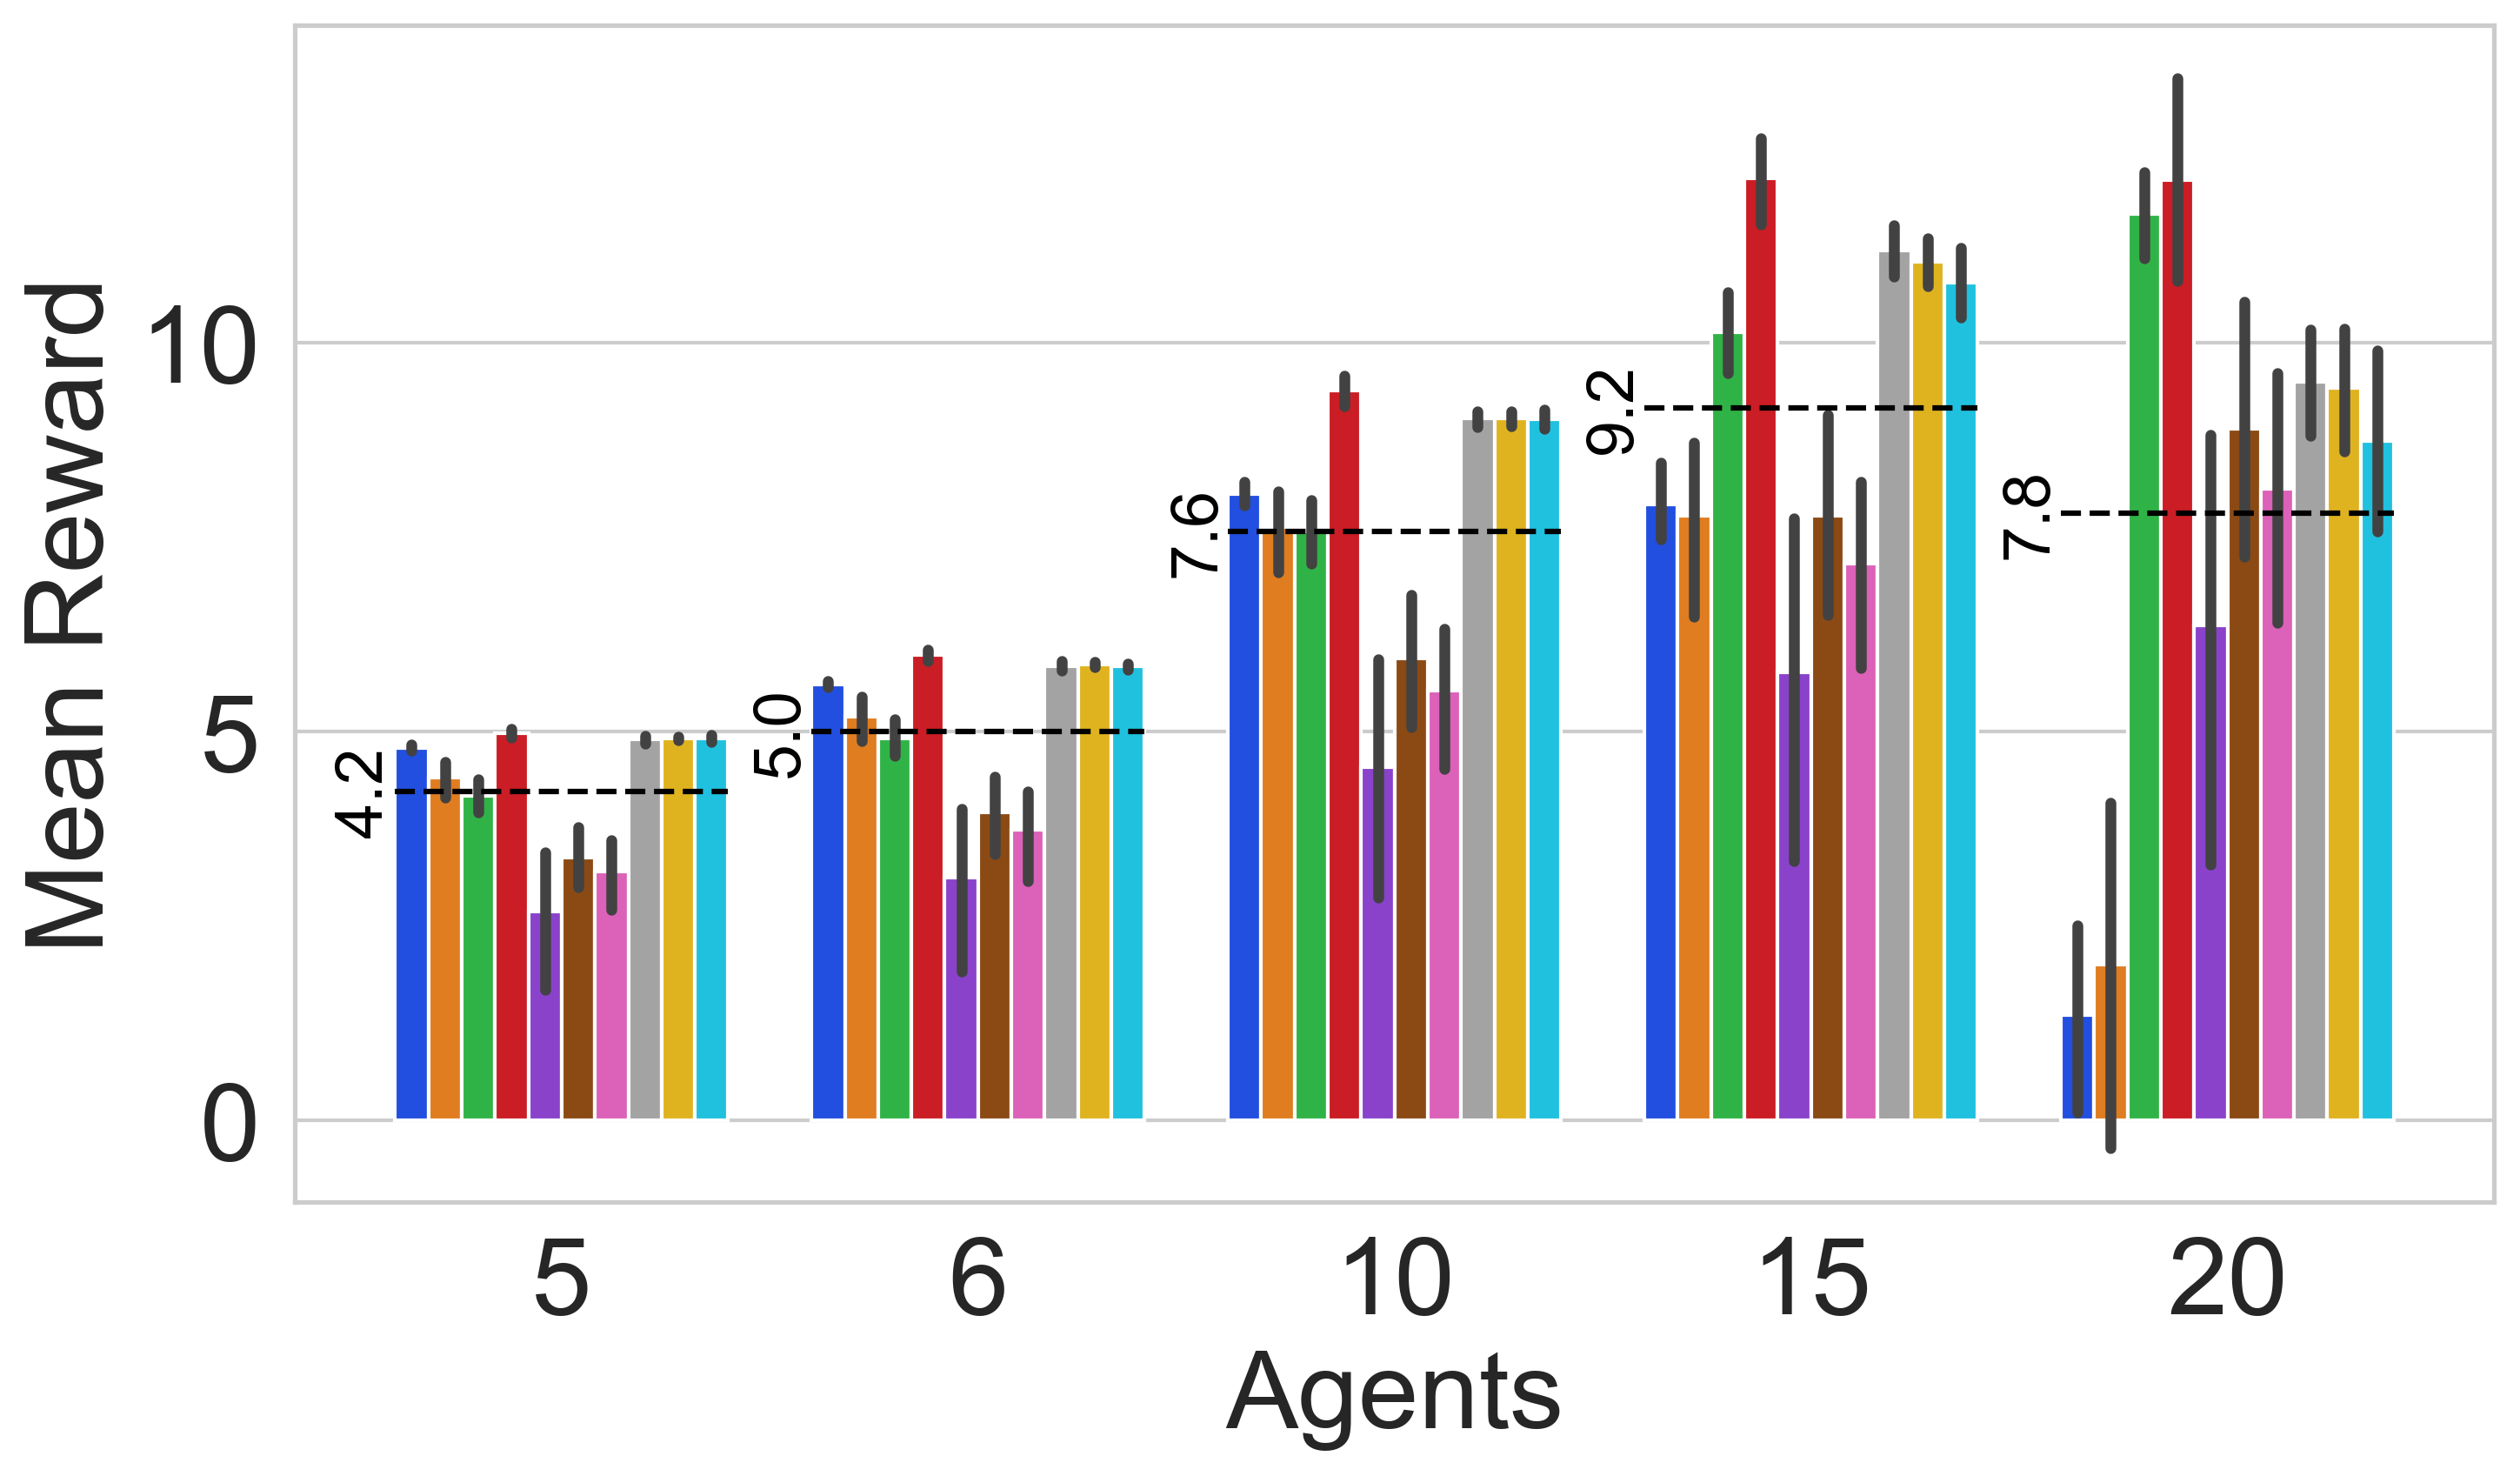

,strategy,agents,rewards
0,concat,5,4.742272
0,concat,5,4.746483
0,concat,5,4.852997
0,concat,5,4.802958
0,concat,5,4.689609
...,...,...,...
49,isab_transformer,20,6.469651
49,isab_transformer,20,6.165424
49,isab_transformer,20,6.999839
49,isab_transformer,20,9.331322


In [33]:
path = '/Users/simonhampp/Desktop/MA/swarm-rl/src/experiments_ma/7_generalizability/saved_experiments/2_navigation_train_low_roll_high_rollout.csv'
plot_variance(path)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# Set global Seaborn theme
sns.set_theme(
    style="whitegrid",
    font_scale=1.5,
    palette="bright",
    rc={"lines.linewidth": 2}
)

def plot_only_legend(strategies):
    # Use Seaborn's current color palette (bright, as set above)
    palette = sns.color_palette()  # Uses the current theme's palette

    # Create dummy handles for the legend
    handles = [Patch(color=palette[i % len(palette)], label=strategies[i]) for i in range(len(strategies))]

    # Create a blank figure for the legend
    fig, ax = plt.subplots()
    ax.axis("off")

    ax.legend(handles=handles, loc="center", frameon=False, fontsize=14, ncol=3)

    fig.set_size_inches(6, 1.5)  # Adjust width/height as needed
    plt.tight_layout()
    plt.show()



strategies = ['CONCAT', 'DS', 'DS_LOCAL', 'DS_GLOBAL', 'GSAGE', 'GAT', 'GATv2', 'SETT', 'TRANS']
plot_only_legend(strategies)
